# 60 years of art at a glance 

## Dates analysis
Proyecto final de bootcamp Ironhack  
Madrid, octubre 2020  
[Dataset](https://github.com/MuseumofModernArt/exhibitions) del MoMA en Github

### Importando bibliotecas

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = pd.read_csv('output/df_1.csv', encoding='latin-1')
pd.options.display.max_columns = 0

In [6]:
df_1.head(5)

,ExhibitionNumber,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionTitle,DisplayName,ExhibitionURL,Country,ArtistBio,Gender,ConstituentURL
0,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh","Alfred H. Barr, Jr.",moma.org/calendar/exhibitions/1767,United States,"American, 1902Â1981",male,moma.org/artists/9168
1,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Paul CÃ©zanne,moma.org/calendar/exhibitions/1767,France,"French, 1839Â1906",male,moma.org/artists/1053
2,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Paul Gauguin,moma.org/calendar/exhibitions/1767,France,"French, 1848Â1903",male,moma.org/artists/2098
3,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Vincent van Gogh,moma.org/calendar/exhibitions/1767,Netherlands,"Dutch, 1853Â1890",male,moma.org/artists/2206
4,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Georges-Pierre Seurat,moma.org/calendar/exhibitions/1767,France,"French, 1859Â1891",male,moma.org/artists/5358


In [7]:
df_1.isna().sum()

ExhibitionNumber          0
ExhibitionBeginDate       0
ExhibitionEndDate      1204
ExhibitionTitle           0
DisplayName             134
ExhibitionURL           433
Country                8598
ArtistBio              8469
Gender                 8762
ConstituentURL          514
dtype: int64

In [8]:
# La columna "ExhibitionEndDate" contiene valores nulos.
# Transformamos estos datos a 0 para poder tratarlos.

df_1["ExhibitionEndDate"] = df_1["ExhibitionEndDate"].fillna(0)

In [9]:
df_1.isna().sum()

ExhibitionNumber          0
ExhibitionBeginDate       0
ExhibitionEndDate         0
ExhibitionTitle           0
DisplayName             134
ExhibitionURL           433
Country                8598
ArtistBio              8469
Gender                 8762
ConstituentURL          514
dtype: int64

In [12]:
df_1.dtypes

ExhibitionNumber       object
ExhibitionBeginDate    object
ExhibitionEndDate      object
ExhibitionTitle        object
DisplayName            object
ExhibitionURL          object
Country                object
ArtistBio              object
Gender                 object
ConstituentURL         object
dtype: object

In [13]:
df_1['ExhibitionBeginDate'] = pd.to_datetime(df_1['ExhibitionBeginDate'])
df_1['ExhibitionEndDate'] = pd.to_datetime(df_1['ExhibitionEndDate'])

In [14]:
df_1.dtypes

ExhibitionNumber               object
ExhibitionBeginDate    datetime64[ns]
ExhibitionEndDate      datetime64[ns]
ExhibitionTitle                object
DisplayName                    object
ExhibitionURL                  object
Country                        object
ArtistBio                      object
Gender                         object
ConstituentURL                 object
dtype: object

In [19]:
# Diferencia entre fechas de inicio y fin
# Creación de nueva columna para establecer la duración de las expos

df_1['Duration'] = (df_1['ExhibitionEndDate'] - df_1['ExhibitionBeginDate']).dt.days
df_1

,ExhibitionNumber,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionTitle,DisplayName,ExhibitionURL,Country,ArtistBio,Gender,ConstituentURL,Duration
0,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh","Alfred H. Barr, Jr.",moma.org/calendar/exhibitions/1767,United States,"American, 1902Â1981",male,moma.org/artists/9168,30
1,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Paul CÃ©zanne,moma.org/calendar/exhibitions/1767,France,"French, 1839Â1906",male,moma.org/artists/1053,30
2,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Paul Gauguin,moma.org/calendar/exhibitions/1767,France,"French, 1848Â1903",male,moma.org/artists/2098,30
3,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Vincent van Gogh,moma.org/calendar/exhibitions/1767,Netherlands,"Dutch, 1853Â1890",male,moma.org/artists/2206,30
4,1,1929-11-07,1929-12-07,"CÃ©zanne, Gauguin, Seurat, Van Gogh",Georges-Pierre Seurat,moma.org/calendar/exhibitions/1767,France,"French, 1859Â1891",male,moma.org/artists/5358,30
...,...,...,...,...,...,...,...,...,...,...,...
34553,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Aijiro Wakita,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1942",male,moma.org/artists/6215,128
34554,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Yoji Yamamoto,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1943",male,moma.org/artists/6486,128
34555,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Ryuichi Yamashiro,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1920",male,moma.org/artists/6487,128
34556,1536,1989-12-09,1990-04-16,Recent Japanese Posters from the Collection,Tadanori Yokoo,moma.org/calendar/exhibitions/1739,Japan,"Japanese, born 1936",male,moma.org/artists/6502,128


### Top 10 exposiciones con mayor tiempo de duración 

/home/paula/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paula/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/paula/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/paula/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


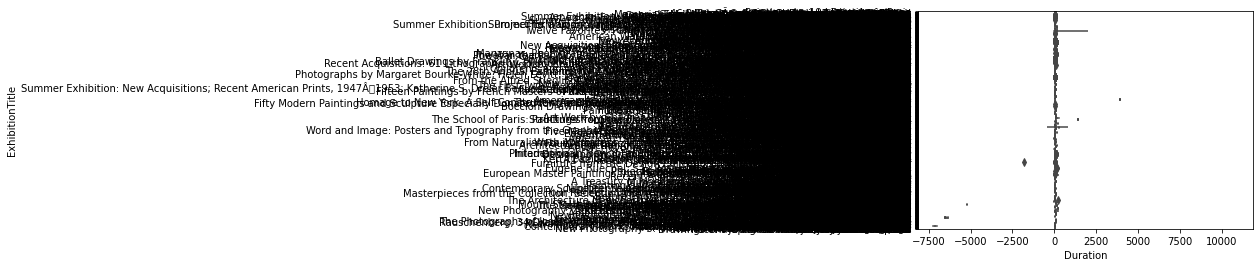

In [21]:
ax = sns.boxplot(x="Duration", y="ExhibitionTitle", data=df_1 )

ValueError: Invalid RGBA argument: 'female'

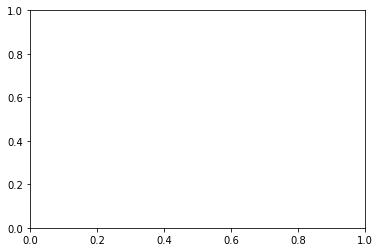

In [29]:
# Géneros de los artistas atendiendo al número de exposiciones en las que internevinieron

df_1['Gender'].value_counts().plot(kind = 'barh', color={"female": "red", "male": "blue"});